# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data.<br>
These patterns include outliers and features of the data that might be unexpected.

EDA is an important first step in any data analysis. 


### Type of EDA

##### Graphical methods and non-graphical methods

1. non-graphical EDA involves calculating summary statistics<br>
2. graphical EDA summarizes the data in a pictorial way

##### Univariate methods and multivariate methods

1. univariate methods consider one variable at a time <br>
2. multivariate methods explore two or more variables

### EDA in Python
This example involves two problems -- both based on a real estate dataset.

I am planning a move to a new place, for example Seattle, WA and are hoping to buy a house/condo/townhouse. For the first problem, using the provided King County real estate transaction information, conduct an Exploratory Data Analysis with the primary objective of collecting information for your future purchase.


Second, there are also new properties available on the market. Please predict price based on square footage (using sqft_living for the square footage).

The data file used for this assignment is from the Coursera course "Machine Learning: Regression" - https://www.coursera.org/learn/ml-regression/home/welcome

In [1]:
# Load modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Current directory
import os
print(os.getcwd())

C:\Users\ZXT3080\GitHub\PythonIntroAndDataModeling\notebooks\BAN7101BusinessAnalytics


In [10]:
### Read data from Excel file
fname = "../../data/kc_house_data.csv"
### read/load the dataset
df = pd.read_csv(fname)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# df is a Pandas object
# shape is an attribute of any Pandas object
# info is a function in Pandas
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

((21613, 21), None)

In [11]:
# I have a Labrador Retriever and she likes swimming. 
# My first personal interest is the waterfront feature in purchasing a house.
# waterfront is a binary feature with values 0 and 1. 
# I'd like to see what the price would be with and without waterfront feature.

mask = df["waterfront"] == 0

df_no_water = df[mask]

df_water = df[~mask]

df_no_water, df_water

(               id             date     price  bedrooms  bathrooms  \
 0      7129300520  20141013T000000  221900.0         3       1.00   
 1      6414100192  20141209T000000  538000.0         3       2.25   
 2      5631500400  20150225T000000  180000.0         2       1.00   
 3      2487200875  20141209T000000  604000.0         4       3.00   
 4      1954400510  20150218T000000  510000.0         3       2.00   
 ...           ...              ...       ...       ...        ...   
 21608   263000018  20140521T000000  360000.0         3       2.50   
 21609  6600060120  20150223T000000  400000.0         4       2.50   
 21610  1523300141  20140623T000000  402101.0         2       0.75   
 21611   291310100  20150116T000000  400000.0         3       2.50   
 21612  1523300157  20141015T000000  325000.0         2       0.75   
 
        sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
 0             1180      5650     1.0           0     0  ...      7   
 1             2

C:\Users\ZXT3080\AppData\Local\Temp\ipykernel_20056\3999796428.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_no_water['price'], df_water['price']],


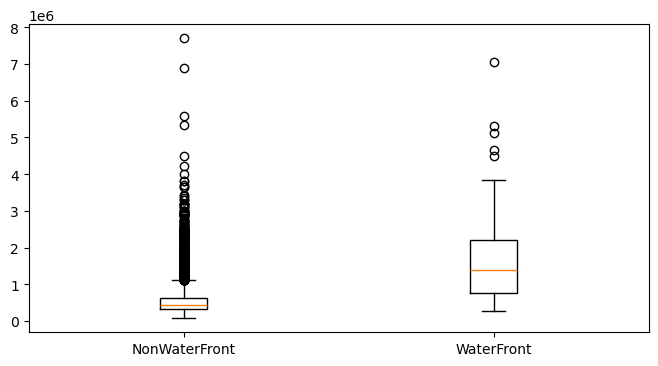

In [12]:
# Creat a box plot to explore the waterfront feature
fig = plt.figure(figsize =(8, 4))
 
# Creating plot
plt.boxplot([df_no_water['price'], df_water['price']], 
              labels = ['NonWaterFront', 'WaterFront'])

# show plot
plt.show()

As showing in the plot, properties with waterfront have much higher value. For money issue, I won't consider those luxury property. And those property are treated as out-liner and filtered out at the moment. And I feel sorry for my fur child.

Using df_no_water for the following analysis

Similarly I will plot more categorical data. <br>
No one wants a new home in a bad condition.<br>
So I will look into the condition and grade features.<br>
House grade or grading refers to the ground level, which has a huge impact in long term condition.

In [13]:
# find unique values in condition and grade conlumns
condition = df_no_water["condition"].unique()
grade = df_no_water["grade"].unique()
condition, grade

(array([3, 5, 4, 1, 2], dtype=int64),
 array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64))

C:\Users\ZXT3080\AppData\Local\Temp\ipykernel_20056\1714955571.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_no_water[df_no_water["condition"] == 1]['price'], df_no_water[df_no_water["condition"] == 2]['price'],


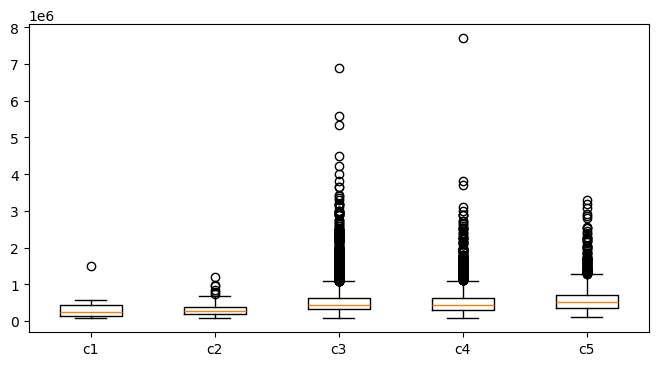

In [14]:
# Creat a box plot to explore the condition feature
fig = plt.figure(figsize = (8, 4))
 
# Creating plot
plt.boxplot([df_no_water[df_no_water["condition"] == 1]['price'], df_no_water[df_no_water["condition"] == 2]['price'], 
             df_no_water[df_no_water["condition"] == 3]['price'], df_no_water[df_no_water["condition"] == 4]['price'], 
             df_no_water[df_no_water["condition"] == 5]['price']], labels = ['c1', 'c2', 'c3', 'c4', 'c5'])

#List Comprehension
# plt.boxplot([df_no_water[df_no_water["condition"] == i]['price'] for i in np.sort(condition)], labels = ['c' + str(i) for i in np.sort(condition)])
 
# show plot
plt.show()

C:\Users\ZXT3080\AppData\Local\Temp\ipykernel_20056\1781875007.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_no_water[df_no_water["grade"] == i]['price'] for i in np.sort(grade)], labels = ['g' + str(i) for i in np.sort(grade)])


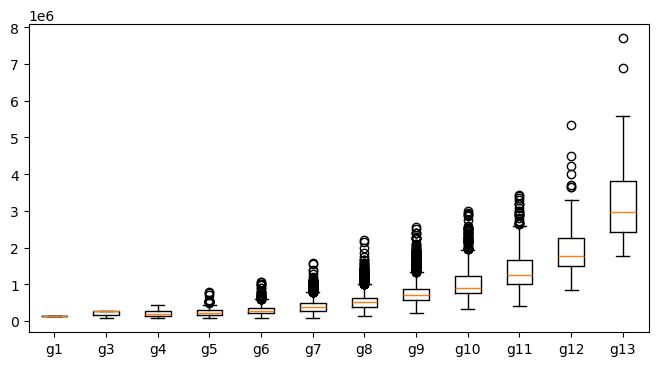

In [15]:
#List Comprehension for grade
fig = plt.figure(figsize = (8, 4))
plt.boxplot([df_no_water[df_no_water["grade"] == i]['price'] for i in np.sort(grade)], labels = ['g' + str(i) for i in np.sort(grade)])
plt.show()

### What does the plot tell you? Can you get some more insights by looking at these plot? Any relation exist?

##### Answer: I found some positive relationship between condition and price, and same positive ralationship for grade. 

### sqft_lot, sqft_above, and sqft_living vs price

Boxplot no longer fits the needs here.<br>
We will need a scatter plot.

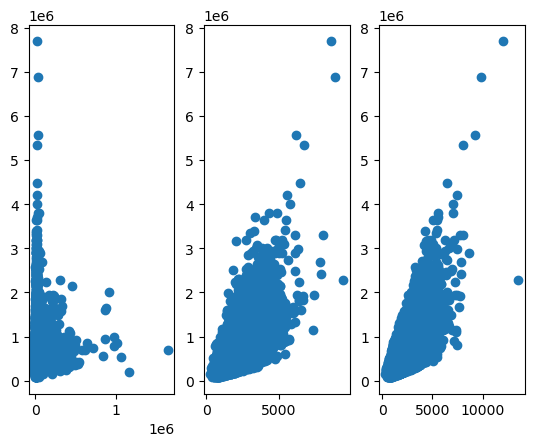

In [16]:
# scatter plot for sqft_lot and price
fig, ax = plt.subplots(1, 3)

ax[0].scatter(df_no_water['sqft_lot'], df_no_water['price'])

ax[1].scatter(df_no_water['sqft_above'], df_no_water['price'])
ax[2].scatter(df_no_water['sqft_living'], df_no_water['price'])
plt.show()

Lot over price plot shows that the lot size is concentrated up to 250k sqft and there are also out-liners. <br>
Sqft_above and sqft_living plots show that there are certain linear relation between those two variable and price respectively. And this matches up with my expectation. 
Next, the value of a property should have some relationship with the zip code. And the zip code refers to the exact community.<Br>
A bar chart is a good option for this.

In [17]:
zipcode = df_no_water["zipcode"].unique()
zipcode, len(zipcode)

(array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
        98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
        98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
        98001, 98056, 98166, 98023, 98148, 98105, 98042, 98008, 98059,
        98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118,
        98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065,
        98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031,
        98106, 98072, 98188, 98070, 98014, 98055, 98039], dtype=int64),
 70)

### Note
It's really redundant to filter out the data by typing each zip code to the function inputs. <br>
Any efficient way to do so? <br>
Yes, there is. Pandas has a build in function called groupby. <br>
This could be a little challenging for new learners. <br>
Let's do it together. <br>

In [18]:
# create a new data frame contains the price and zipcode info
df_zip = pd.DataFrame(df_no_water[["zipcode", "price"]])
zip_info = df_zip.groupby(['zipcode']).mean()
zip_info, type(zip_info)

(                price
 zipcode              
 98001    2.808047e+05
 98002    2.342840e+05
 98003    2.941113e+05
 98004    1.338475e+06
 98005    8.102897e+05
 ...               ...
 98177    6.739644e+05
 98178    2.889567e+05
 98188    2.890783e+05
 98198    2.879781e+05
 98199    7.887454e+05
 
 [70 rows x 1 columns],
 pandas.core.frame.DataFrame)

<Axes: xlabel='zipcode'>

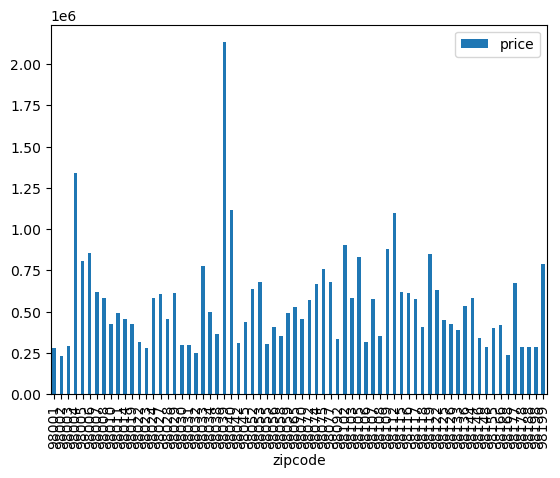

In [19]:
zip_info.plot.bar()

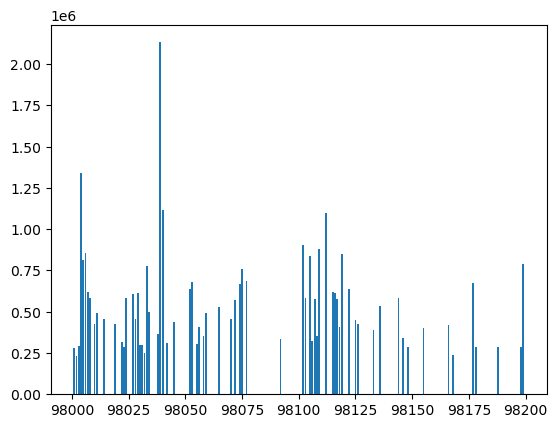

In [20]:
# The above bar chart is not good, because of the x axis. 
# barplot using less values in x axis.
subset_ticks = zip_info.index[[0, 10, 20, 30, 40, 50, 60]]

price = list(zip_info.price)
zipcode = list(zip_info.index)
plt.bar(zipcode, price)

# This one is going to be better.
plt.show()

This plot shows that the average price over different zip code. I can see that the price in certain areas are significantly higher than the others. By searching on Google maps, Amazon office buildings are mainly located at 98101, 98109, 98121. To think of a home purchasing, I personally want my home located not too far away from my work, school and grocery. So I will take this into consideration. 

Next, I want to know how the price per square feet is changing. To get this information, I need to add addtional columns to the dataset. 

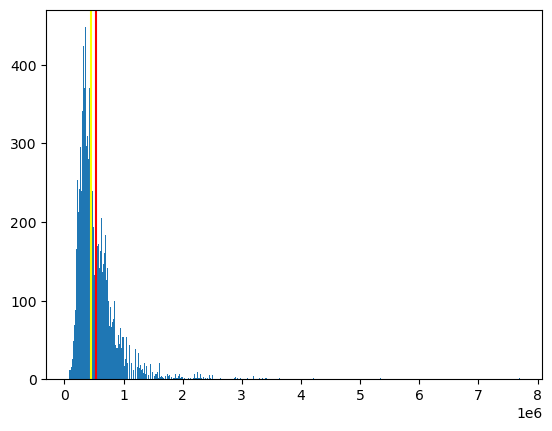

In [21]:
# A price histogram overview
plt.hist(df_no_water['price'], bins = 1000)
plt.axvline(df_no_water['price'].mean(axis = 0), color='red', label='Mean')
plt.axvline(df_no_water['price'].median(axis = 0), color='yellow', label='Median')
plt.show()

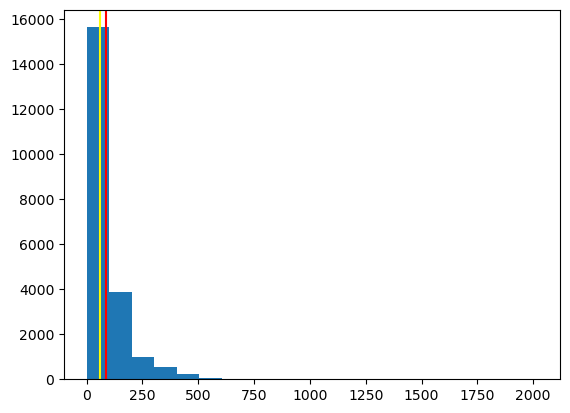

In [22]:
# A price over lot size histogram overview
# create lotPrice column and add to the dataframe
lotprice = df_no_water['price'] / df_no_water['sqft_lot']
df_no_water = pd.concat([df_no_water, lotprice], axis = 1)
df_no_water.rename(columns = {list(df_no_water.columns)[-1]: 'lotPrice'}, inplace = True)

# plot
plt.hist(df_no_water['lotPrice'], bins = 20)
plt.axvline(df_no_water['lotPrice'].mean(axis = 0), color='red', label='Mean')
plt.axvline(df_no_water['lotPrice'].median(axis = 0), color='yellow', label='Median')
plt.show()

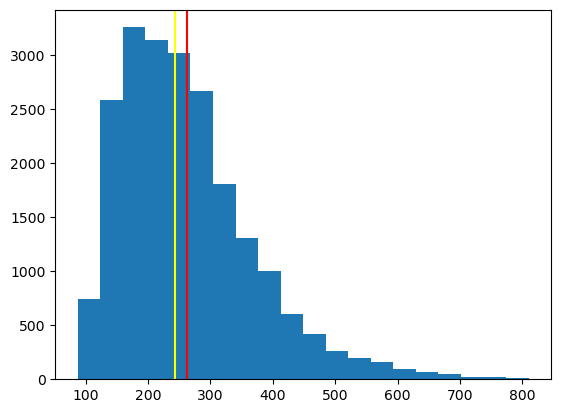

In [23]:
# A price over the size of living room histogram overview
# create livingPrice column and add to the dataframe
livingprice = df_no_water['price'] / df_no_water['sqft_living']
df_no_water = pd.concat([df_no_water, livingprice], axis = 1)
df_no_water.rename(columns = {list(df_no_water.columns)[-1]: 'livingPrice'}, inplace = True)

# plot
plt.hist(df_no_water['livingPrice'], bins = 20)
plt.axvline(df_no_water['livingPrice'].mean(axis = 0), color='red', label='Mean')
plt.axvline(df_no_water['livingPrice'].median(axis = 0), color='yellow', label='Median')
plt.show()

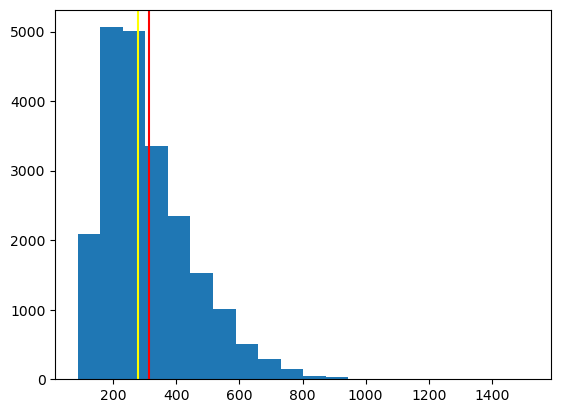

In [24]:
# A price over the size of above histogram overview
# create livingPrice column and add to the dataframe
aboveprice = df_no_water['price'] / df_no_water['sqft_above']
df_no_water = pd.concat([df_no_water, aboveprice], axis = 1)
df_no_water.rename(columns = {list(df_no_water.columns)[-1]: 'abovePrice'}, inplace = True)

#plot
plt.hist(df_no_water['abovePrice'], bins = 20)
plt.axvline(df_no_water['abovePrice'].mean(axis = 0), color='red', label='Mean')
plt.axvline(df_no_water['abovePrice'].median(axis = 0), color='yellow', label='Median')
plt.show()

As the plots showing above, the average price are always higher than the median. And I can conclude that the real estate market is a kind of right skewed distribution in terms of unit price. And people will usually get what they paid for. So I will filter my purchasing in around the mean and average. As I can reward my purchasing with a reasonable quality and price. 

Next, when purchasing a new home, everyone will like to buy a brand-new home and be the first owner. On one hand, this purchasing intention will usually go beyond people's purchasing power. On the other hand, if the house is too old, it may require frequent repair or remodel which may lead to a non-negligible expense. In my case, instead of a new house, I will focus more on the condition of the property. To get this information I will make this data manipulation. 

Next, I have a family and a lovely baby girl. I will prefer at least 3 bedroom and 3 restrooms. I like to play rock music. It will be great if I can have a free rock space and keep the noise in that space from neighbor and sleepy baby. So a basement works best for me. And I will filter my results with a condition statement based on the basement feature.

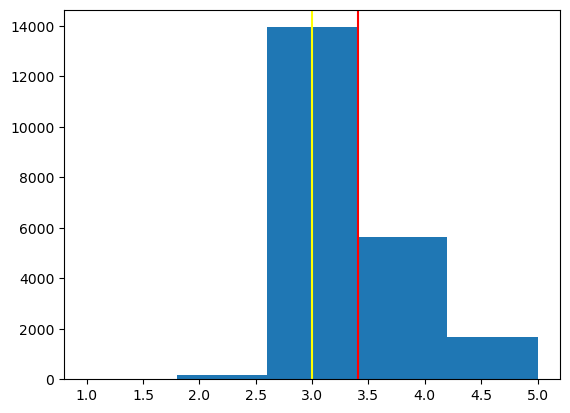

In [26]:
# A condition histogram overview
plt.hist(df_no_water['condition'], bins = 5)
plt.axvline(df_no_water['condition'].mean(axis = 0), color='red', label='Mean')
plt.axvline(df_no_water['condition'].median(axis = 0), color='yellow', label='Median')
plt.show()

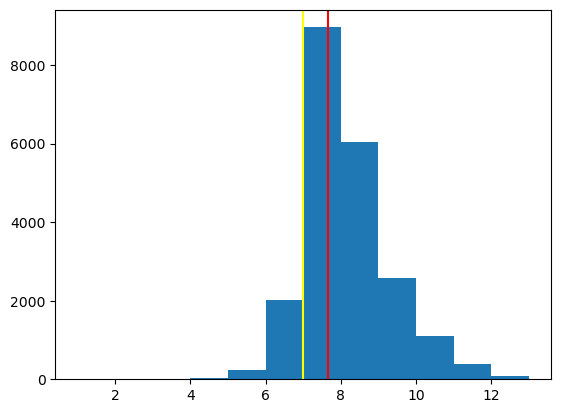

In [27]:
# A grade histogram overview
plt.hist(df_no_water['grade'], bins = len(grade))
plt.axvline(df_no_water['grade'].mean(axis = 0), color='red', label='Mean')
plt.axvline(df_no_water['grade'].median(axis = 0), color='yellow', label='Median')
plt.show()

0        False
1         True
2        False
3         True
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: sqft_basement, Length: 21450, dtype: bool

C:\Users\ZXT3080\AppData\Local\Temp\ipykernel_20056\2602161364.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  basement.replace(False, 0, inplace = True)


0        0
1        1
2        0
3        1
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: sqft_basement, Length: 21450, dtype: int64

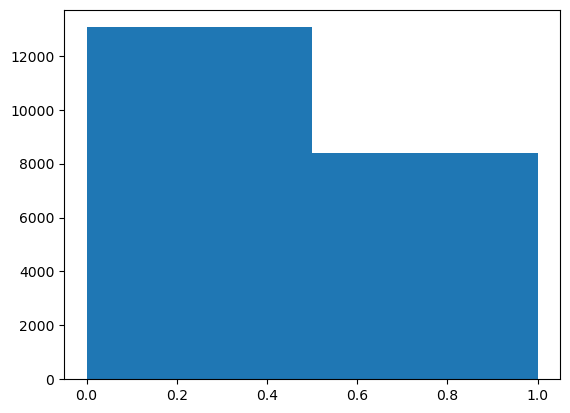

In [25]:
# A basement histogram overview
basement = df_no_water['sqft_basement'] > 0
display(basement)
basement.replace(True, 1, inplace = True)
basement.replace(False, 0, inplace = True)
display(basement)
plt.hist(basement, bins = 2)
plt.show()

### Note
As we can see, most of the properties are in condition 3 and better. So I will filter my result beyond 3. <br>
Beside, most grades are 7 or higher. So I will filter my search greater or equal to 7.<br>

As I checked on Google maps, Tacoma international airport is located in the south part of Seattle.<br> 
To avoid noise and traffic, I will prefer a home at the north part of Seattle and close to the sea for pleasure.<br>
So the latitude should be greater than 48 and longitude should be smaller than -122.

In [29]:
# Now, let me try to filter my searching.
results = df_no_water.loc[(df_no_water['bedrooms'] >= 3) & (df_no_water['bathrooms'] >= 3) &
                          (df_no_water['lat'] >= 47.5) & (df_no_water['long'] <= -121.5) &
                          (df_no_water['abovePrice'] >= 200) & (df_no_water['abovePrice'] <= 400) & 
                          (df_no_water['livingPrice'] >= 200) & (df_no_water['livingPrice'] <= 400) &
                          (df_no_water['lotPrice'] >= 200) & (df_no_water['lotPrice'] <= 400) & 
                          (df_no_water['sqft_basement'] > 0) & (df_no_water['condition'] >= 3) &
                          (df_no_water['grade'] > 7)]
results

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lotPrice,livingPrice,abovePrice
658,259900160,20150102T000000,748000.0,4,3.50,2770,3330,2.0,0,0,...,2001,0,98052,47.6327,-122.109,2180,3380,224.624625,270.036101,379.695431
1373,8032700140,20141028T000000,830000.0,5,3.00,2920,2808,2.0,0,0,...,1960,1992,98103,47.6540,-122.342,1620,1544,295.584046,284.246575,387.850467
1497,6362900172,20140923T000000,499950.0,3,3.50,1820,1991,2.0,0,0,...,2014,0,98144,47.5960,-122.298,1550,1460,251.104972,274.697802,349.615385
1848,3271800295,20150203T000000,1570000.0,5,4.50,5620,5800,3.0,0,3,...,1999,0,98199,47.6482,-122.412,2360,5800,270.689655,279.359431,334.042553
2153,2880100160,20141119T000000,1010000.0,4,3.50,3350,3752,2.0,0,0,...,2007,0,98117,47.6782,-122.365,1050,4960,269.189765,301.492537,396.078431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21346,8562790080,20150209T000000,825750.0,4,3.50,2950,3737,2.0,0,0,...,2012,0,98027,47.5313,-122.074,2580,3581,220.966016,279.915254,363.766520
21426,1070000180,20141015T000000,1110000.0,4,3.50,3660,4760,2.0,0,0,...,2014,0,98199,47.6482,-122.409,3210,4640,233.193277,303.278689,390.845070
21457,3629700120,20141014T000000,669950.0,3,3.00,2330,1944,2.5,0,0,...,2014,0,98027,47.5446,-122.016,2290,1407,344.624486,287.532189,343.564103
21477,7010700308,20141112T000000,1010000.0,4,3.25,3610,4000,2.0,0,0,...,2007,0,98199,47.6580,-122.396,1980,4000,252.500000,279.778393,382.575758


In [32]:
# which one you will pick
finalSearch = results[results['yr_built'] > 2013]
finalSearch

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lotPrice,livingPrice,abovePrice
1497,6362900172,20140923T000000,499950.0,3,3.50,1820,1991,2.0,0,0,...,2014,0,98144,47.5960,-122.298,1550,1460,251.104972,274.697802,349.615385
11397,6362900171,20140527T000000,499950.0,3,3.50,1820,1501,2.0,0,0,...,2014,0,98144,47.5960,-122.298,1550,1501,333.077948,274.697802,349.615385
15591,1315300095,20140812T000000,790000.0,4,3.50,2720,3000,2.0,0,0,...,2014,0,98136,47.5371,-122.388,1600,4600,263.333333,290.441176,351.111111
19658,8562790310,20150324T000000,839704.0,4,3.25,2950,4161,2.0,0,0,...,2014,0,98027,47.5297,-122.073,2790,3693,201.803413,284.645424,379.956561
20904,7242800040,20150120T000000,519990.0,4,3.25,1690,1321,2.0,0,0,...,2014,0,98052,47.6780,-122.117,3080,4558,393.633611,307.686391,393.931818
21001,8562790150,20140626T000000,782900.0,4,3.25,3060,3898,2.0,0,0,...,2014,0,98027,47.5311,-122.073,2920,3448,200.846588,255.849673,340.391304
21426,1070000180,20141015T000000,1110000.0,4,3.50,3660,4760,2.0,0,0,...,2014,0,98199,47.6482,-122.409,3210,4640,233.193277,303.278689,390.845070
21457,3629700120,20141014T000000,669950.0,3,3.00,2330,1944,2.5,0,0,...,2014,0,98027,47.5446,-122.016,2290,1407,344.624486,287.532189,343.564103
